In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman')

In [12]:
L=420e-6
H=80e-6
Pe = 0.01
DO2 = 7.63596e-6
H = 80e-6
w=20e-6
U_0 = Pe*DO2/w
umax=1.5*U_0
Tref=773
rhof=4.4908
Mwf=0.02888
x_O2=0.22


In [13]:
def readComsol(time=0.002):
    x_centerline_file_comsol="./maxDeltaT1e-4/validate/plots/output-x-centerline.txt"
    with open(x_centerline_file_comsol,"r") as fp:
        lines=fp.readlines()
        header=lines[8]
    header=re.split(r" +(?![t@(])",header)
    header.pop(0)
    header[-1]=header[-1].strip()
    df_comsol_x_centerline = pd.read_csv(x_centerline_file_comsol, comment='%', sep='\\s+', header=None,names=header)
    df_comsol_x_centerline.sort_values(by="x",inplace=True)
    df_comsol_x_centerline.reset_index(drop=True,inplace=True)
    df_comsol_x_centerline.fillna(0,inplace=True)

    comsol_label=f"T (K) @ t={time}"
    df_norm_comsol=pd.DataFrame(columns=["NormalizedLength","NormalizedValue"])
    df_norm_comsol["NormalizedLength"]=df_comsol_x_centerline["x"]/L
    df_norm_comsol["NormalizedValue"]=df_comsol_x_centerline[comsol_label]/Tref
    return df_norm_comsol

In [14]:
def read(time=0.002,folder="maxDeltaT1e-4",file="x-centerline_T_O2_CO2.csv",axis='x',obj='T',refLength=L,refValue=Tref):
    path=f"./{folder}/postProcessing/singleGraph/{str(time)}/{file}"
    df_dbs=pd.read_csv(path)
    df_norm_dbs=pd.DataFrame(columns=["NormalizedLength","NormalizedValue"])
    if obj=="T":
        df_norm_dbs["NormalizedLength"]=df_dbs[axis]/refLength
        df_norm_dbs["NormalizedValue"]=df_dbs[obj]/refValue
    else:
        df_norm_dbs["NormalizedLength"]=df_dbs[axis]/refLength
        df_norm_dbs["NormalizedValue"]=df_dbs[obj]
    return df_norm_dbs

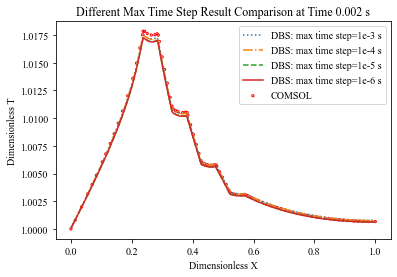

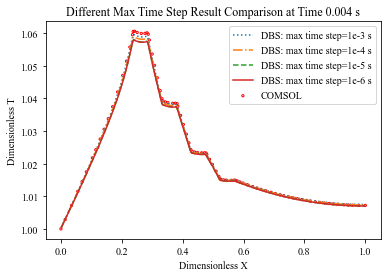

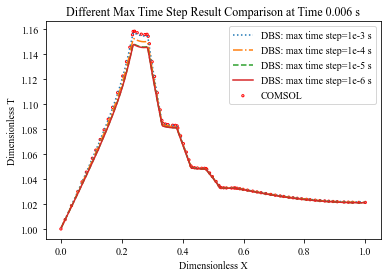

In [15]:

for t in np.arange(2,7,2)*0.001:
    df_norm_comsol=readComsol(time=t)
    df_norm_dbs_maxDeltaT1e_3=read(time=t,folder="maxDeltaT1e-3")
    df_norm_dbs_maxDeltaT1e_4=read(time=t,folder="maxDeltaT1e-4")
    df_norm_dbs_maxDeltaT1e_5=read(time=t,folder="maxDeltaT1e-5")
    df_norm_dbs_maxDeltaT1e_6=read(time=t,folder="maxDeltaT1e-6")

    fig, ax = plt.subplots()
    ax.scatter(df_norm_comsol["NormalizedLength"][df_norm_comsol.index%5==0],df_norm_comsol["NormalizedValue"][df_norm_comsol.index%5==0],color="",marker="o",s=5,edgecolors="r",label="COMSOL")
    ax.plot(df_norm_dbs_maxDeltaT1e_3["NormalizedLength"],df_norm_dbs_maxDeltaT1e_3["NormalizedValue"],lineStyle=":",label="DBS: max time step=1e-3 s")
    ax.plot(df_norm_dbs_maxDeltaT1e_4["NormalizedLength"],df_norm_dbs_maxDeltaT1e_4["NormalizedValue"],lineStyle="-.",label="DBS: max time step=1e-4 s")
    ax.plot(df_norm_dbs_maxDeltaT1e_5["NormalizedLength"],df_norm_dbs_maxDeltaT1e_5["NormalizedValue"],lineStyle="--",label="DBS: max time step=1e-5 s")
    ax.plot(df_norm_dbs_maxDeltaT1e_6["NormalizedLength"],df_norm_dbs_maxDeltaT1e_6["NormalizedValue"],lineStyle="-",label="DBS: max time step=1e-6 s")
    ax.set_xlabel(f"Dimensionless X")
    ax.set_ylabel(f"Dimensionless T")
    ax.set_title(f"Different Max Time Step Result Comparison at Time {t} s")
    ax.legend(loc="upper right")